In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
time = np.linspace(0, 1, 512)
def sinwave(amp, freq, time, phase=0):
  return amp * np.sin(freq*time + phase)

def coswave(amp, freq, time, phase=0):
  return amp * np.cos(freq*time + phase)

def Wavg(input):
  return input.sum()/input.size

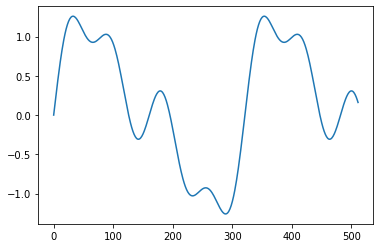

(512,) float32


In [10]:
w31 = sinwave(1, 10, time)
w32 = sinwave(0.5, 20, time)
w33 = sinwave(1/3, 40, time)
sample = w31+w32+w33
sample = sample.astype(np.float32)
plt.plot(sample)
plt.show()
print(sample.shape, sample.dtype)

In [11]:
filename = "bin/input.bin"
with open(filename, 'wb') as f:
    sample.tofile(f)

In [29]:
with open("bin/output.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    res = np.fromfile(f, dtype=rectype)

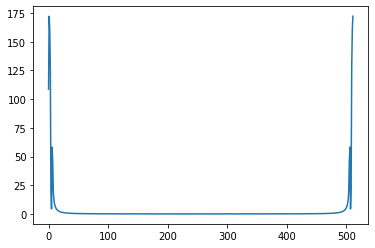

In [44]:
# plt.plot(res)
cft_r = res[:512]
cft_i = res[512:]
plt.plot(np.sqrt(cft_r**2 + cft_i**2))


In [47]:
with open("bin/recover.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    rec = np.fromfile(f, dtype=rectype)
print(rec.shape, rec.dtype)

(1024,) float32


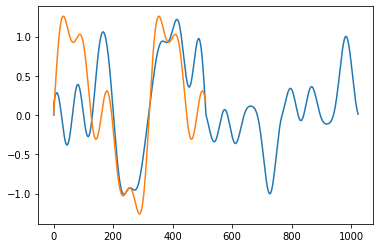

In [50]:
plt.plot(rec)
plt.plot(sample)

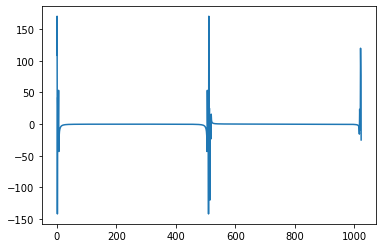

In [51]:
nft = np.fft.fft(sample)
plt.plot(np.append(nft.real, nft.imag))

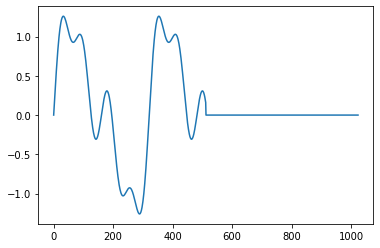

In [53]:
nrec = np.fft.ifft(nft)
plt.plot(np.append(nrec.real, nrec.imag))